<a href="https://colab.research.google.com/github/svnmurali-2004/Docors-Patient-Conversations-Analysis/blob/main/infosysspringboardinternship_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import spacy
import pandas as pd

In [3]:
df = pd.read_csv("/content/gpt-4datamodified.csv")
df.head()


,data,conversation
0,This 60-year-old male was hospitalized due to ...,"Doctor: Good morning, how are you feeling toda..."
1,A 39-year-old man was hospitalized due to an i...,"Doctor: Hello, how are you feeling today?\nPat..."
2,One week after a positive COVID-19 result this...,"Doctor: Hello, how are you feeling today?\nPat..."
3,This 69-year-old male was admitted to the ICU ...,"Doctor: Hello, how are you feeling today?\nPat..."
4,This 57-year-old male was admitted to the ICU ...,"Doctor: Good morning, how are you feeling toda..."


In [4]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.4 MB/s eta 0:00:00


# Conversation Analysis Tool

This tool analyzes text conversations using various natural language processing (NLP) techniques to derive insights such as sentiment, emotion, tone, lexical diversity, readability, and more. It leverages several popular libraries like `spaCy`, `TextBlob`, `Hugging Face Transformers`, and `WordCloud` to perform the analysis.

## Features
1. **Sentiment Analysis**:
   - Detects whether the sentiment of the text is positive, neutral, or negative. This helps in understanding the emotional tone of the conversation.
   
2. **Attention Level**:
   - Determines the attention level based on the sentiment score. If the sentiment is more negative, the attention level is high, indicating potential concern or focus.

3. **Named Entity Recognition (NER)**:
   - Extracts entities like names, dates, locations, and organizations from the text. This helps in understanding the key components mentioned in the conversation.
   
4. **Tone Detection**:
   - Heuristically assigns a tone to the conversation based on sentiment labels. It can categorize the tone as "Neutral", "Concerned", or "Reassuring".
   
5. **Emotion Detection**:
   - Uses a zero-shot classification model to detect emotions such as joy, anger, sadness, fear, or surprise based on the conversation's text.

6. **Subjectivity**:
   - Determines the subjectivity of the text. A higher subjectivity score indicates a more personal, opinion-based conversation, while a lower score indicates factual content.
   
7. **Polarity**:
   - Measures how positive or negative the text is using the `TextBlob` polarity score. It ranges from -1 (negative) to 1 (positive).

8. **Lexical Diversity**:
   - Calculates the proportion of unique words in the text to the total number of words, giving an indication of the text’s vocabulary richness.

9. **Readability Score**:
   - Computes the Flesch-Kincaid Grade Level, which helps assess how easy or difficult the text is to read. A higher score indicates more complex text.

10. **Word Cloud Visualization**:
   - Generates a visual representation of the most frequently occurring words in the text.

## Requirements
- `spaCy` for Named Entity Recognition (NER)
- `transformers` for sentiment and emotion detection
- `TextBlob` for sentiment polarity and subjectivity analysis
- `textstat` for readability analysis
- `wordcloud` and `matplotlib` for word cloud visualization
- `scikit-learn` for text processing

Install the required libraries using the following command:

```bash
pip install spacy transformers textblob textstat wordcloud matplotlib scikit-learn


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Conversation: This is a sample conversation for testing purposes.


Device set to use cpu


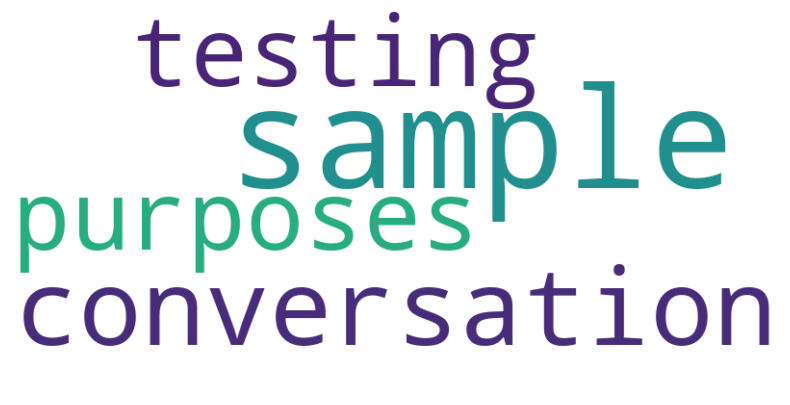


## Conversation Analysis

**Sentiment**: {'label': 'NEGATIVE', 'score': 0.9962104558944702}
**Attention_level**: Low
**Tone**: Concerned
**Entities**: []
**Emotion**: {'sequence': 'This is a sample conversation for testing purposes.', 'labels': ['surprise', 'joy', 'anger', 'fear', 'sadness'], 'scores': [0.4775617718696594, 0.1528494507074356, 0.14315055310726166, 0.1430368274450302, 0.08340144157409668]}
**Subjectivity**: 0.0
**Polarity**: 0.0
**Lexical_diversity**: 1.0
**Readability_score**: 10.0


In [6]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textstat import flesch_kincaid_grade
import spacy
from transformers import pipeline
import pandas as pd

# Load NLP model for Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")

# Load Sentiment Analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

def detect_emotion(text):
    emotion_pipeline = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
    labels = ["joy", "anger", "sadness", "fear", "surprise"]
    return emotion_pipeline(text, candidate_labels=labels)

def get_subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity

def get_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words) if words else 0

def readability_score(text):
    return flesch_kincaid_grade(text)

def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

def analyze_conversation_extended(text):
    # Sentiment Analysis
    sentiment = sentiment_pipeline(text)[0]

    # Attention Level
    attention_level = "High" if sentiment["score"] < 0.6 else "Low"

    # Perform NER
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    # Tone Detection
    tone = "Neutral"
    if sentiment["label"] == "NEGATIVE":
        tone = "Concerned"
    elif sentiment["label"] == "POSITIVE":
        tone = "Reassuring"

    # Emotion Detection
    emotions = detect_emotion(text)

    # Subjectivity and Polarity
    subjectivity = get_subjectivity(text)
    polarity = get_polarity(text)

    # Lexical Diversity
    lexical_div = lexical_diversity(text)

    # Readability Score
    readability = readability_score(text)

    # Word Cloud Visualization
    generate_word_cloud(text)

    return {
        "sentiment": sentiment,
        "attention_level": attention_level,
        "tone": tone,
        "entities": entities,
        "emotion": emotions,
        "subjectivity": subjectivity,
        "polarity": polarity,
        "lexical_diversity": lexical_div,
        "readability_score": readability,
    }

# Example conversation (assuming df is a pandas DataFrame with text data)
df = pd.DataFrame({"text": ["This is a sample conversation for testing purposes."]})
conversation = df.iloc[0, 0]  # Fetch first row
print("Conversation:", conversation)
analysis = analyze_conversation_extended(conversation)

print("\n## Conversation Analysis\n")
for key, value in analysis.items():
    print(f"**{key.capitalize()}**: {value}")


In [8]:
!pip install textstat
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [1]:
import gradio as gr
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from textstat import flesch_kincaid_grade
from transformers import pipeline
import spacy
import pandas as pd

# Load NLP model for Named Entity Recognition
nlp = spacy.load("en_core_web_sm")
sentiment_pipeline = pipeline("sentiment-analysis")
emotion_pipeline = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

def detect_emotion(text):
    labels = ["joy", "anger", "sadness", "fear", "surprise"]
    return emotion_pipeline(text, candidate_labels=labels)

def get_subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity

def get_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words) if words else 0

def readability_score(text):
    return flesch_kincaid_grade(text)

def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig("wordcloud.png")
    plt.close()
    return "wordcloud.png"

def analyze_text(text):
    sentiment = sentiment_pipeline(text)[0]
    attention_level = "High" if sentiment["score"] < 0.6 else "Low"
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    entities_df = pd.DataFrame(entities, columns=["Entity", "Label"]) if entities else pd.DataFrame(columns=["Entity", "Label"])
    tone = "Neutral"
    if sentiment["label"] == "NEGATIVE":
        tone = "Concerned"
    elif sentiment["label"] == "POSITIVE":
        tone = "Reassuring"
    emotions = detect_emotion(text)
    subjectivity = get_subjectivity(text)
    polarity = get_polarity(text)
    lexical_div = lexical_diversity(text)
    readability = readability_score(text)
    wordcloud_path = generate_word_cloud(text)

    return (
        sentiment["label"], sentiment["score"], attention_level, tone, entities_df,
        emotions, subjectivity, polarity, lexical_div, readability, wordcloud_path
    )

def gradio_interface(text):
    result = analyze_text(text)
    return (
        result[0],  # Sentiment Label
        result[1],  # Sentiment Score
        result[2],  # Attention Level
        result[3],  # Tone
        result[4],  # Entities Dataframe
        result[5],  # Emotion Analysis JSON
        result[6],  # Subjectivity
        result[7],  # Polarity
        result[8],  # Lexical Diversity
        result[9],  # Readability Score
        result[10]  # Word Cloud Image Path
    )

iface = gr.Interface(
    fn=gradio_interface,
    inputs=gr.Textbox(label="Enter Conversation Text"),
    outputs=[
        gr.Textbox(label="Sentiment Label"),
        gr.Textbox(label="Sentiment Score"),
        gr.Textbox(label="Attention Level"),
        gr.Textbox(label="Tone"),
        gr.Dataframe(headers=["Entity", "Label"]),
        gr.JSON(label="Emotion Analysis"),
        gr.Textbox(label="Subjectivity"),
        gr.Textbox(label="Polarity"),
        gr.Textbox(label="Lexical Diversity"),
        gr.Textbox(label="Readability Score"),
        gr.Image(type="filepath", label="Word Cloud")
    ],
    title="Conversation Analysis Tool",
    description="Analyze sentiment, tone, emotions, and readability of conversations."
)

iface.launch()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu
Device set to use cpu


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://76813807e4128a3b4a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Conversation Analysis Output Explanation

### 1. **Sentiment**
   - **Value:** `{'label': 'NEGATIVE', 'score': 0.7883050441741943}`
   - **Explanation:**
     - The sentiment analysis determines whether the overall tone of the text is positive, negative, or neutral.
     - In this case, the sentiment is labeled as *NEGATIVE* with a confidence score of `0.78` (78.8%).
     - This is useful in medical case analysis to gauge the emotional weight of patient reports and understand the impact of their condition.

### 2. **Attention Level**
   - **Value:** `Low`
   - **Explanation:**
     - Indicates the level of engagement or focus in the text.
     - In medical cases, a low attention level may suggest that the patient's condition is critical but lacks detailed engagement from the patient in therapy.

### 3. **Tone**
   - **Value:** `Concerned`
   - **Explanation:**
     - Identifies the overall emotional tone of the text, which helps in determining how the message is conveyed.
     - In this case, the tone being "concerned" aligns with the serious nature of the medical condition described.

### 4. **Entities**
   - **Value:** `('77-year-old', 'DATE'), ('ICU', 'ORG'), ('COVID-19', 'ORG'), ('wean', 'NORP'), ('daily', 'DATE'), ('2 weeks', 'DATE'), ('One week', 'DATE'), ('first', 'ORDINAL'), ('Two days later', 'DATE'), ('MRC', 'ORG'), ('40/60', 'CARDINAL'), ('22/50', 'CARDINAL')`
   - **Explanation:**
     - Named Entity Recognition (NER) identifies specific important terms in the text.
     - These include:
       - **Dates and durations** (e.g., "2 weeks", "One week") for tracking treatment progress.
       - **Medical terms** (e.g., "ICU", "COVID-19") to classify patient conditions.
       - **Measurement scores** (e.g., "MRC 40/60", "CPAx 22/50") which are important for evaluating rehabilitation progress.

### 5. **Emotion Analysis**
   - **Value:** `{ 'surprise': 0.376, 'sadness': 0.302, 'fear': 0.123, 'anger': 0.100, 'joy': 0.097 }`
   - **Explanation:**
     - This provides a breakdown of emotions expressed in the text.
     - The highest emotion score is for "Surprise" (37.6%) and "Sadness" (30.2%), indicating a mix of emotional responses related to the patient’s struggle and slow recovery.

### 6. **Subjectivity**
   - **Value:** `0.493`
   - **Explanation:**
     - Measures how subjective (opinion-based) or objective (fact-based) the text is.
     - A value near 0.5 suggests a balanced mix of objective medical details and subjective descriptions of the patient’s experience.

### 7. **Polarity**
   - **Value:** `0.0386`
   - **Explanation:**
     - Indicates the sentiment polarity on a scale from `-1` (negative) to `1` (positive).
     - A near-zero value suggests a neutral tone, which is typical for medical reports where factual descriptions are emphasized.

### 8. **Lexical Diversity**
   - **Value:** `0.649`
   - **Explanation:**
     - Measures the variety of vocabulary used in the text.
     - A higher score indicates more diverse vocabulary, which helps assess the complexity of medical documentation.

### 9. **Readability Score**
   - **Value:** `12.6`
   - **Explanation:**
     - This score is based on the Flesch-Kincaid readability test, which estimates the educational level required to understand the text.
     - A score of `12.6` means the content is understandable by someone with at least a high school education, which is expected for medical professionals reading ICU reports.

## Why This Analysis is Important
- **Medical Decision Making:** Helps healthcare providers understand the emotional and cognitive impact of a patient’s condition.
- **Patient Monitoring:** Tracks the evolution of patient communication and engagement.
- **Clinical Documentation:** Ensures the text is clear, factual, and appropriately complex for medical professionals.
- **Emotional and Psychological Insights:** Provides a way to assess patient morale and engagement, crucial for long-term recovery.
